# Assignment - 2
## Donal Loitam(AI21BTECH11009)

#### Instructions
- To better illustrate the effects of non-linear point operations (on gray scale images), use only copyright-free images from NASA’s site: http://apod.nasa.gov/apod/archivepix.html. Convert color images to gray scale using any tool you like.


- For NASA images, please mention the link in your code comments
    - Spacecraft Pic : https://apod.nasa.gov/apod/ap221117.html
    - Ring Hubble: https://apod.nasa.gov/apod/ap210817.html
    - Wild Triplet Pic : https://apod.nasa.gov/apod/ap221108.html
    - Sailing Stone Pic :  https://apod.nasa.gov/apod/ap200413.html
    - Venus Pic: https://apod.nasa.gov/apod/ap210225.html

In [1]:
%matplotlib inline

from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
import warnings
warnings.filterwarnings("ignore")

### Helper functions

In [2]:
def read_image(img_path: str):
    """ 
        Read an image from the input file path and returns it as a numpy array.
                                                                                    """
    img = np.asarray(Image.open(img_path))
    return img



def create_histogram(I: np.ndarray):
    """
        Returns a histogram for the pixel values in the input image array(I).
        Params:
            I : A 2d numpy array representing the gray-scale image
    
                                                                                """
    freq_array = [0 for i in range(256)]
    
    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            freq_array[int(I[i, j])] += 1

    return np.array(freq_array)



def rgb_to_gray_scale(I: np.ndarray):
    """
            Returns input image if it's already grayscale
            Then, Checks if the input image is RGB image. If not, returns NONE
            Else, Converts an RGB image to Gray Scale image using the formula
            Y' = 0.2989 R + 0.5870 G + 0.1140 B 
                                                                                     """
    
    if len(I.shape) == 2 or (len(I.shape) == 3 and I.shape[2] == 1):
        return I 
    
    if len(I.shape) != 3 or I.shape[2] != 3:
        print("The Image is not RGB ")
        return None
        
    return np.dot(I[...,:3], [0.2989, 0.5870, 0.1140])


### Read  all the images which we will be working on :-
- Spacecraft Pic : https://apod.nasa.gov/apod/ap221117.html
- Ring Hubble: https://apod.nasa.gov/apod/ap210817.html
- Wild Triplet Pic : https://apod.nasa.gov/apod/ap221108.html
- Sailing Stone Pic :  https://apod.nasa.gov/apod/ap200413.html
- Venus Pic: https://apod.nasa.gov/apod/ap210225.html

In [3]:
# Define the image paths
spacecraft_path = "Orion_Spacecraft_Earth_Views_20221116-1067.jpg"
ringhubble_path = "Ring_HubbleSchmidt_960.jpg"
sailingstone_path = "SailingStone_Burke_960.jpg"
wildtriplet_path = "WildTriplet_Hubble_960.jpg"
venus_path = "wispr_venus_image.jpg"

# Read the images
spacecraft = read_image(spacecraft_path)
ringhubble = read_image(ringhubble_path)
sailingstone = read_image(sailingstone_path)
wildtriplet = read_image(wildtriplet_path)
venus = read_image(venus_path)

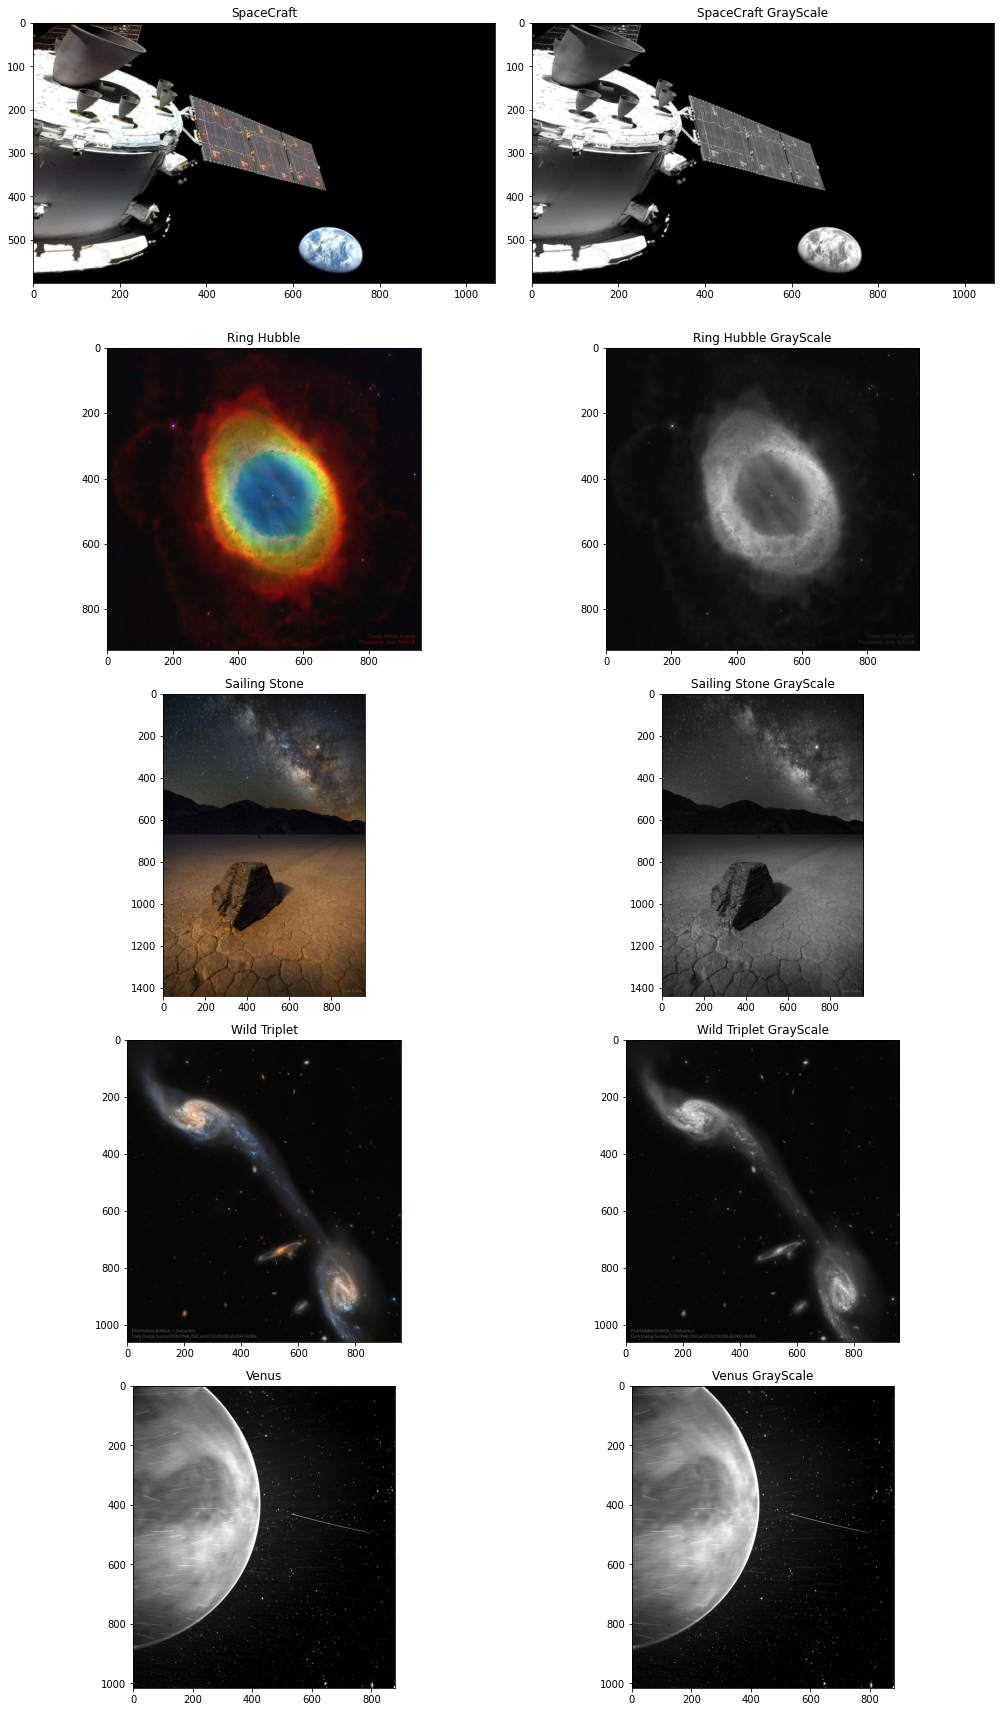

In [4]:
fig, axs = plt.subplots(5, 2, figsize=(14, 24))

img_list = [spacecraft, ringhubble, sailingstone, wildtriplet, venus]
title_list = ['SpaceCraft', 'Ring Hubble', 'Sailing Stone', 'Wild Triplet', 'Venus']

# Plot the original images
for i in range(0, 5):
    if(len(img_list[i].shape) == 2):
        axs[i, 0].imshow(img_list[i], cmap='gray')
    else:
        axs[i, 0].imshow(img_list[i])
    axs[i, 0].set_title(title_list[i])

    
for i in range(0, 5):
    axs[i, 1].imshow(rgb_to_gray_scale(img_list[i]), cmap='gray')
    axs[i, 1].set_title(title_list[i] + ' GrayScale')
    

plt.tight_layout()
plt.show()

# 1. Gray Scale Point Operations (10)

### Q 1. 
Perform simple linear point operations for the following cases:

(a) J = P.I

(b) J = I + L 

(c) J = P.I + L 

In each case, verify that the histogram of J is related to the histogram of I according to the relation
discussed in class.


In [5]:
def linear_point_operations(I:np.ndarray, scale, offset):
    """ 
        Performs a simple linear point operation on the input numpy array 
          Args:
              I: The image array as a numpy 2d array
              P: Scaling factor
              L: The offset factor
          Returns:
                  The result of the applied linear operation on the input array(image)
          
                                                                                                """
    J = I*scale + offset
    return np.clip(J, 0, 255).astype(np.uint8)         # for dtype consistency

### a) J = P.I

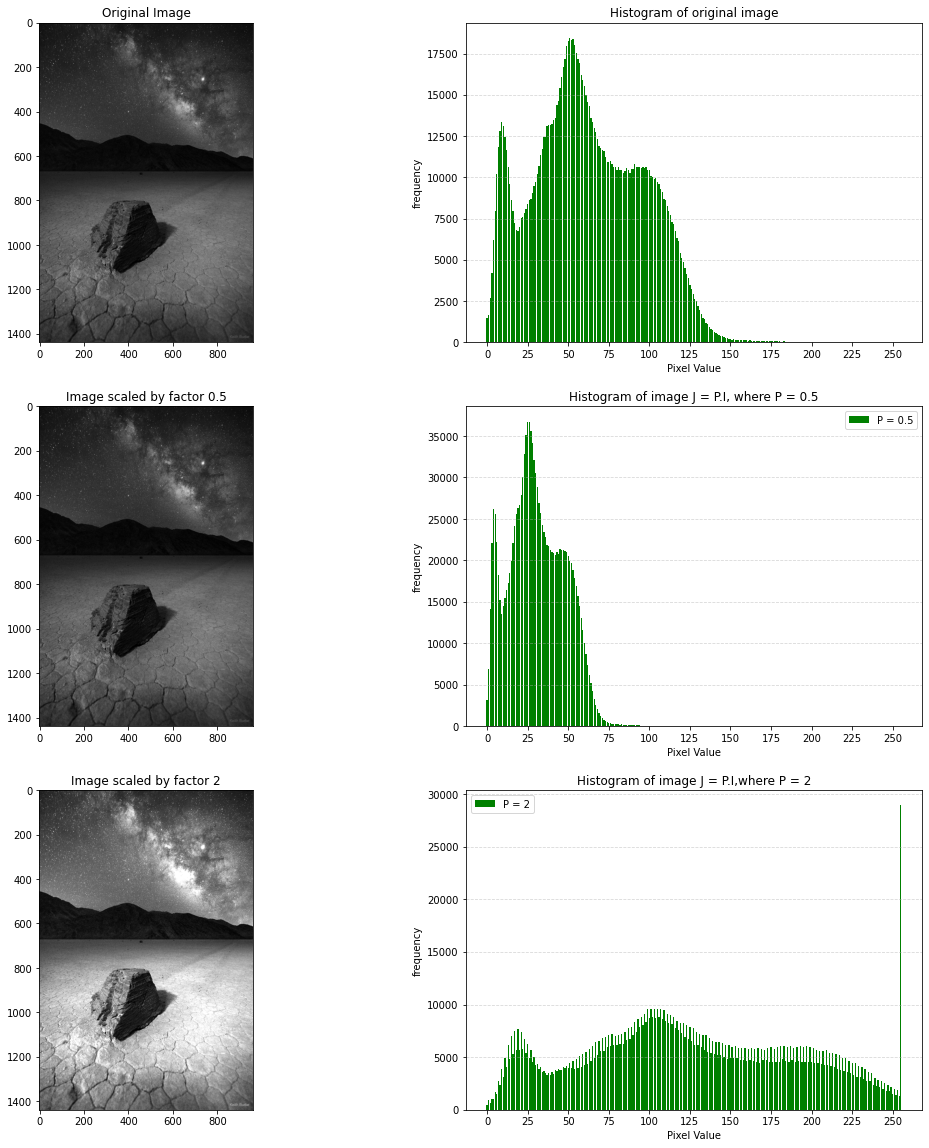

In [6]:
# a) J = P.I (Case when L = 0)

gray_sailing_stone = rgb_to_gray_scale(sailingstone)

plt.figure(figsize=(18, 20))

plt.subplot(3, 2, 1)
plt.imshow(gray_sailing_stone, cmap='gray')
plt.title("Original Image")

hist = create_histogram(gray_sailing_stone)
plt.subplot(3, 2, 2)
plt.bar(range(len(hist)), hist, color='green')
plt.xlabel('Pixel Value')
plt.ylabel('frequency')
plt.title('Histogram of original image')
plt.xticks(np.arange(0, 256, 25)) 
plt.grid(axis='y', linestyle='--', alpha=0.5)

P = 0.5
plt.subplot(3, 2, 3)
plt.imshow(linear_point_operations(gray_sailing_stone, 0.5, 0), cmap='gray')
plt.title("Image scaled by factor 0.5")

hist = create_histogram(linear_point_operations(gray_sailing_stone, 0.5, 0))
plt.subplot(3, 2, 4)
plt.bar(range(len(hist)), hist, color='green')
plt.xlabel('Pixel Value')
plt.ylabel('frequency')
plt.legend([f'P = {P}'])
plt.title('Histogram of image J = P.I, where P = 0.5')
plt.xticks(np.arange(0, 256, 25)) 
plt.grid(axis='y', linestyle='--', alpha=0.5)


P = 2
plt.subplot(3, 2, 5)
plt.imshow(linear_point_operations(gray_sailing_stone, 2, 0), cmap='gray')
plt.title("Image scaled by factor 2")

hist = create_histogram(linear_point_operations(gray_sailing_stone, 2, 0))
plt.subplot(3, 2, 6)
plt.bar(range(len(hist)), hist, color='green')
plt.xlabel('Pixel Value')
plt.ylabel('frequency')
plt.title('Histogram of image J = P.I,where P = 2')
plt.legend([f'P = {P}'])
plt.xticks(np.arange(0, 256, 25)) 
plt.grid(axis='y', linestyle='--', alpha=0.5)


plt.show()

### b) J = I + L 

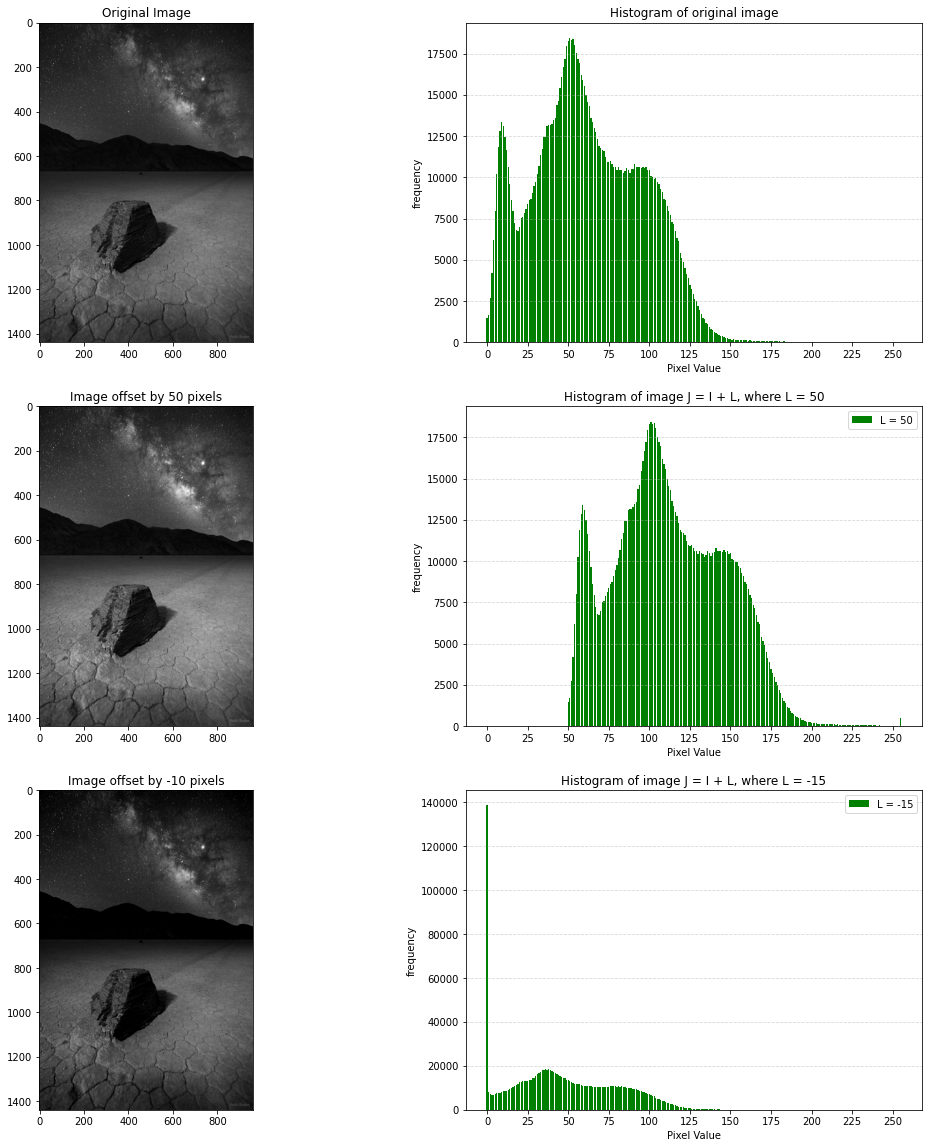

In [7]:
# B) J = I + L (Case when P = 1)

P = 1
gray_sailing_stone = rgb_to_gray_scale(sailingstone)

plt.figure(figsize=(18, 20))

plt.subplot(3, 2, 1)
plt.imshow(gray_sailing_stone, cmap='gray')
plt.title("Original Image")

hist = create_histogram(gray_sailing_stone)
plt.subplot(3, 2, 2)
plt.bar(range(len(hist)), hist, color='green')
plt.xlabel('Pixel Value')
plt.ylabel('frequency')
plt.title('Histogram of original image')
plt.xticks(np.arange(0, 256, 25)) 
plt.grid(axis='y', linestyle='--', alpha=0.5)

L = 50
plt.subplot(3, 2, 3)
plt.imshow(linear_point_operations(gray_sailing_stone, P, L), cmap='gray')
plt.title(f"Linearly Operated Image(P = {P}, L = {L})")
plt.title(f"Image offset by 50 pixels")


hist = create_histogram(linear_point_operations(gray_sailing_stone, P, L))
plt.subplot(3, 2, 4)
plt.bar(range(len(hist)), hist, color='green')
plt.xlabel('Pixel Value')
plt.ylabel('frequency')
plt.legend([f'L = {L}'])
plt.title(f'Histogram of image J = I + L, where L = {L}')
plt.xticks(np.arange(0, 256, 25)) 
plt.grid(axis='y', linestyle='--', alpha=0.5)


L = -15
plt.subplot(3, 2, 5)
plt.imshow(linear_point_operations(gray_sailing_stone, P, L), cmap='gray')
plt.title(f"Image offset by -10 pixels")

hist = create_histogram(linear_point_operations(gray_sailing_stone, P, L))
plt.subplot(3, 2, 6)
plt.bar(range(len(hist)), hist, color='green')
plt.xlabel('Pixel Value')
plt.ylabel('frequency')
plt.title(f'Histogram of image J = I + L, where L = {L}')
plt.legend([f'L = {L}'])
plt.xticks(np.arange(0, 256, 25)) 
plt.grid(axis='y', linestyle='--', alpha=0.5)


plt.show()

### c) J = P.I + L

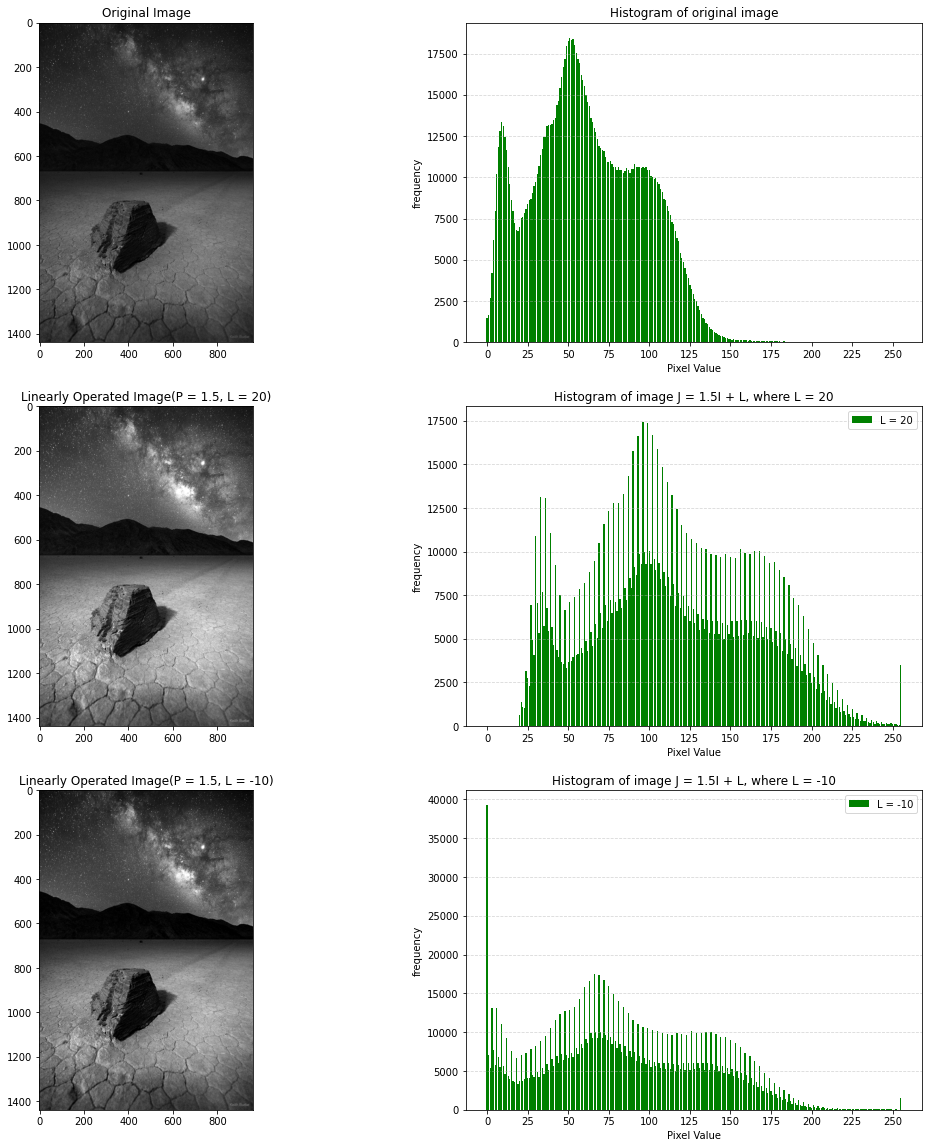

In [8]:
# B) J = I + L (Case when P = 1)

P = 1.5
gray_sailing_stone = rgb_to_gray_scale(sailingstone)

plt.figure(figsize=(18, 20))

plt.subplot(3, 2, 1)
plt.imshow(gray_sailing_stone, cmap='gray')
plt.title("Original Image")

hist = create_histogram(gray_sailing_stone)
plt.subplot(3, 2, 2)
plt.bar(range(len(hist)), hist, color='green')
plt.xlabel('Pixel Value')
plt.ylabel('frequency')
plt.title('Histogram of original image')
plt.xticks(np.arange(0, 256, 25)) 
plt.grid(axis='y', linestyle='--', alpha=0.5)

L = 20
plt.subplot(3, 2, 3)
plt.imshow(linear_point_operations(gray_sailing_stone, P, L), cmap='gray')
plt.title(f"Linearly Operated Image(P = {P}, L = {L})")

hist = create_histogram(linear_point_operations(gray_sailing_stone, P, L))
plt.subplot(3, 2, 4)
plt.bar(range(len(hist)), hist, color='green')
plt.xlabel('Pixel Value')
plt.ylabel('frequency')
plt.legend([f'L = {L}'])
plt.title(f'Histogram of image J = {P}I + L, where L = {L}')
plt.xticks(np.arange(0, 256, 25)) 
plt.grid(axis='y', linestyle='--', alpha=0.5)


L = -10
plt.subplot(3, 2, 5)
plt.imshow(linear_point_operations(gray_sailing_stone, P, L), cmap='gray')
plt.title(f"Linearly Operated Image(P = {P}, L = {L})")

hist = create_histogram(linear_point_operations(gray_sailing_stone, P, L))
plt.subplot(3, 2, 6)
plt.bar(range(len(hist)), hist, color='green')
plt.xlabel('Pixel Value')
plt.ylabel('frequency')
plt.title(f'Histogram of image J = {P}I + L, where L = {L}')
plt.legend([f'L = {L}'])
plt.xticks(np.arange(0, 256, 25)) 
plt.grid(axis='y', linestyle='--', alpha=0.5)


plt.show()

Q 2. Full scale contrast stretch (FSCS). Verify your result by printing the min and max pixel values before
and after applying FSCS. Also, plot the histogram of the image before and after applying FSCS.

In [9]:
def FSCS(I: np.ndarray, K = 256):
    """ 
        Performs Full Scale Contrast Stretch(FSCS) on the given image.
            Args:
                 I : the input Image as numpy 2d array
                 K : the number of gray levels(256 default)
            Returns:
                Full Scale Constrast Stretched Image.
                                                                """
    
    # Solve: PA + L = 0
    #        PB + L = K - 1
    
    max_gray_value = np.max(I)
    min_gray_value = np.min(I) 
    
    scale = (K - 1)/(max_gray_value - min_gray_value)
    offset = -min_gray_value * scale
    
    return linear_point_operations(I, scale, offset)

In [10]:
# spacecraft, ringhubble, sailingstone ,wildtriplet, venus
gray_spacecraft = rgb_to_gray_scale(spacecraft)
gray_ringhubble = rgb_to_gray_scale(ringhubble)
gray_wildtriplet = rgb_to_gray_scale(wildtriplet)
gray_venus = rgb_to_gray_scale(venus)

### Verifying FSCS on Ringhubble

Before FSCS: Min pixel value = 0.0, Max = 252.03949999999998
After FSCS: Min pixel value = 0, Max = 255 



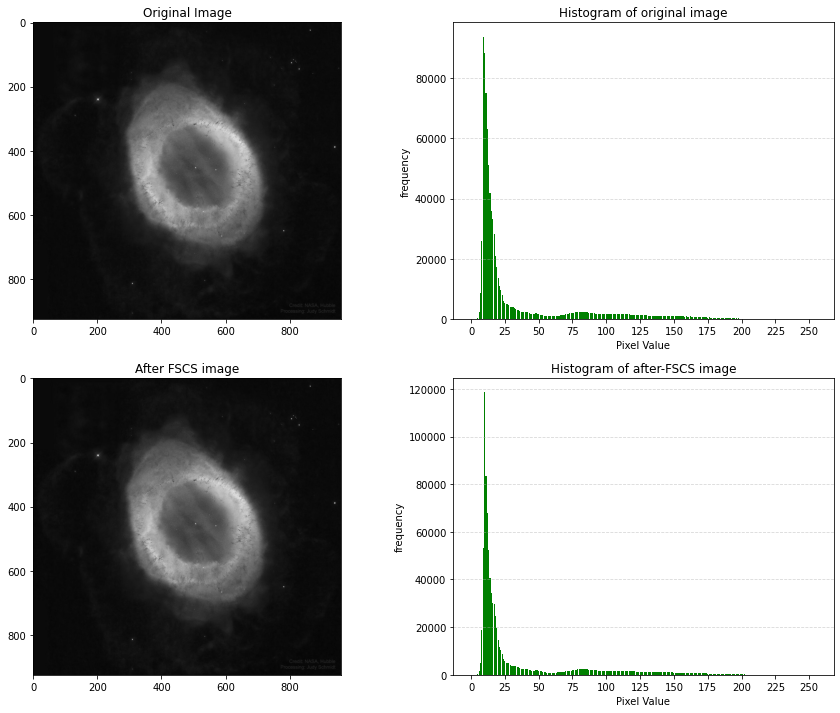

In [11]:
min_before = np.min(gray_ringhubble)
max_before = np.max(gray_ringhubble)

afterFSCS_ringhubble = FSCS(gray_ringhubble)

min_after = np.min(afterFSCS_ringhubble)
max_after = np.max(afterFSCS_ringhubble)

print(f"Before FSCS: Min pixel value = {min_before}, Max = {max_before}")

plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
plt.imshow(gray_ringhubble, cmap='gray')
plt.title("Original Image")

hist = create_histogram(gray_ringhubble)
plt.subplot(2, 2, 2)
plt.bar(range(len(hist)), hist, color='green')
plt.xlabel('Pixel Value')
plt.ylabel('frequency')
plt.title('Histogram of original image')
plt.xticks(np.arange(0, 256, 25)) 
plt.grid(axis='y', linestyle='--', alpha=0.5)

print(f"After FSCS: Min pixel value = {min_after}, Max = {max_after} \n")


plt.subplot(2, 2, 3)
plt.imshow(afterFSCS_ringhubble, cmap='gray')
plt.title(f"After FSCS image")

hist = create_histogram(afterFSCS_ringhubble)
plt.subplot(2, 2, 4)
plt.bar(range(len(hist)), hist, color='green')
plt.xlabel('Pixel Value')
plt.ylabel('frequency')
plt.title(f'Histogram of after-FSCS image')
plt.xticks(np.arange(0, 256, 25)) 
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

### Ques 3
Q 3. Log magnitude compression (always followed by FSCS). Plot the histogram of the image before and
after applying log magnitude compression.

In [12]:
def log_magnitude_compression(I: np.ndarray):
    """ 
        Performs Log magnitude commpression on the given input image.
            Args:
                 I : the input Image as numpy 2d array
            Returns:
                Log magnitude compressed Image.
                                                                """
    if np.max(I) == 255:
        I_log = np.log(I.astype(np.float32) + 1)  # Convert to float to avoid overflow
    else:
        I_log = np.log(I + 1)
        
    return FSCS(I_log)   # Always followed by FSCS

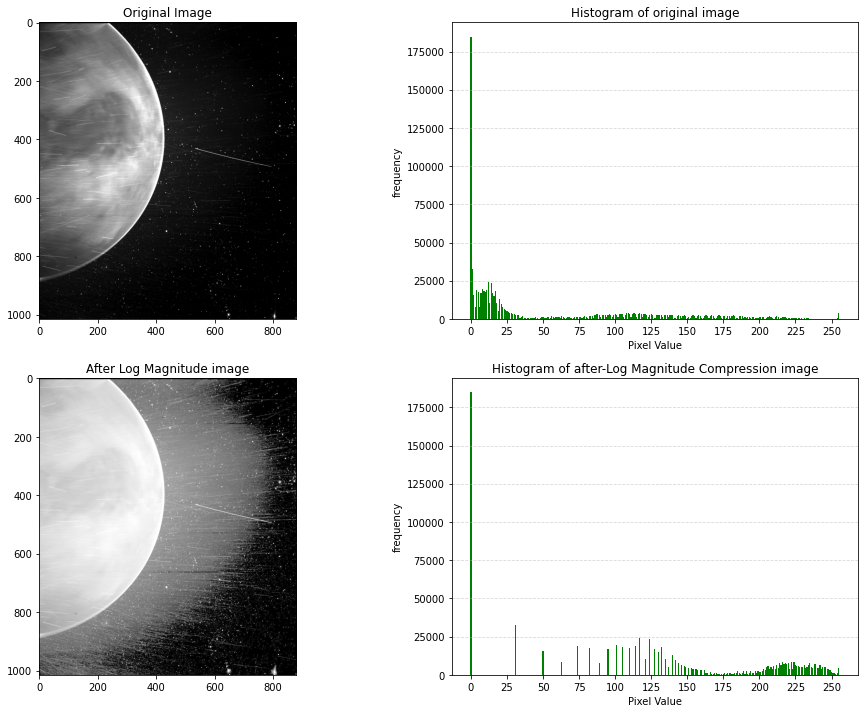

In [13]:
plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
plt.imshow(gray_venus, cmap='gray')
plt.title("Original Image")

hist = create_histogram(gray_venus)
plt.subplot(2, 2, 2)
plt.bar(range(len(hist)), hist, color='green')
plt.xlabel('Pixel Value')
plt.ylabel('frequency')
plt.title('Histogram of original image')
plt.xticks(np.arange(0, 256, 25)) 
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Apply Log Magnitude compression
afterlog_venus = log_magnitude_compression(gray_venus)

plt.subplot(2, 2, 3)
plt.imshow(afterlog_venus, cmap='gray')
plt.title(f"After Log Magnitude image")

hist = create_histogram(afterlog_venus)
plt.subplot(2, 2, 4)
plt.bar(range(len(hist)), hist, color='green')
plt.xlabel('Pixel Value')
plt.ylabel('frequency')
plt.title(f'Histogram of after-Log Magnitude Compression image')
plt.xticks(np.arange(0, 256, 25)) 
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

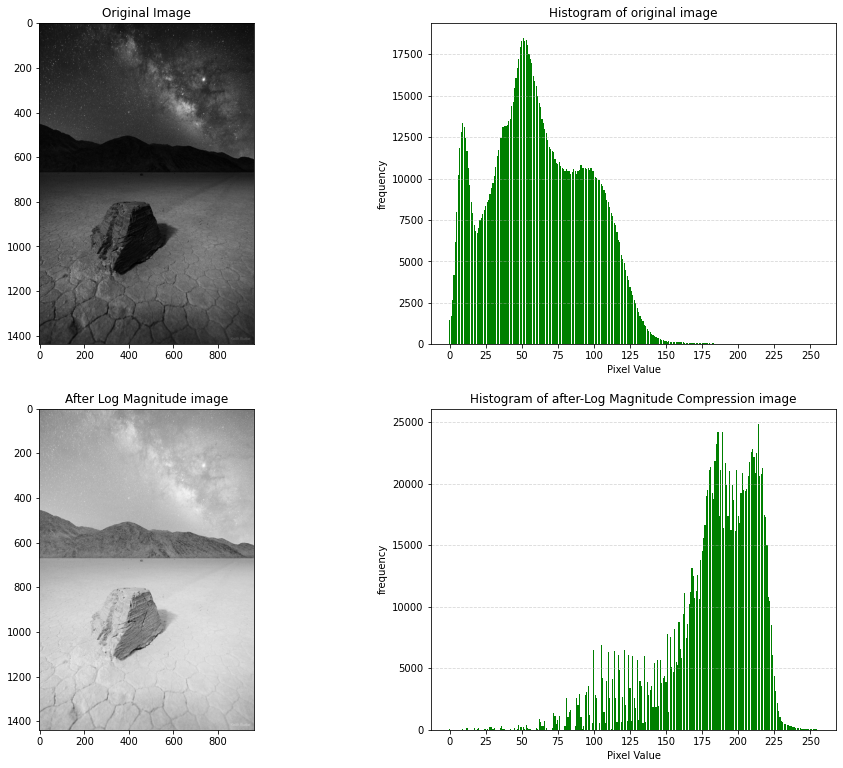

In [14]:
plt.figure(figsize=(16, 13))

plt.subplot(2, 2, 1)
plt.imshow(gray_sailing_stone, cmap='gray')
plt.title("Original Image")

hist = create_histogram(gray_sailing_stone)
plt.subplot(2, 2, 2)
plt.bar(range(len(hist)), hist, color='green')
plt.xlabel('Pixel Value')
plt.ylabel('frequency')
plt.title('Histogram of original image')
plt.xticks(np.arange(0, 256, 25)) 
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Apply Log Magnitude compression
afterlog_sailing_stone = log_magnitude_compression(gray_sailing_stone)

plt.subplot(2, 2, 3)
plt.imshow(afterlog_sailing_stone, cmap='gray')
plt.title(f"After Log Magnitude image")

hist = create_histogram(afterlog_sailing_stone)
plt.subplot(2, 2, 4)
plt.bar(range(len(hist)), hist, color='green')
plt.xlabel('Pixel Value')
plt.ylabel('frequency')
plt.title(f'Histogram of after-Log Magnitude Compression image')
plt.xticks(np.arange(0, 256, 25)) 
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

### Ques 4
Q 4. Gamma correction: J = $I^γ$ with γ = 1.4. Clip pixel values greater than 255 to 255. Plot the histogram
of the image before and after applying gamma correction. 

In [15]:
def gamma_correction(I:np.ndarray, gamma=1.4):
    """ 
        Performs gamma correction on the given input image.
            Args:
                 I : the input Image as numpy 2d array
                 gamma(float): the Exponent value for gamma correction (1.4 default). 
            Returns:
                Gamma corrected Image.
                                                                """
    
    return np.clip(I**gamma, 0, 255).astype(np.uint8)   # to esnure dtype consistency

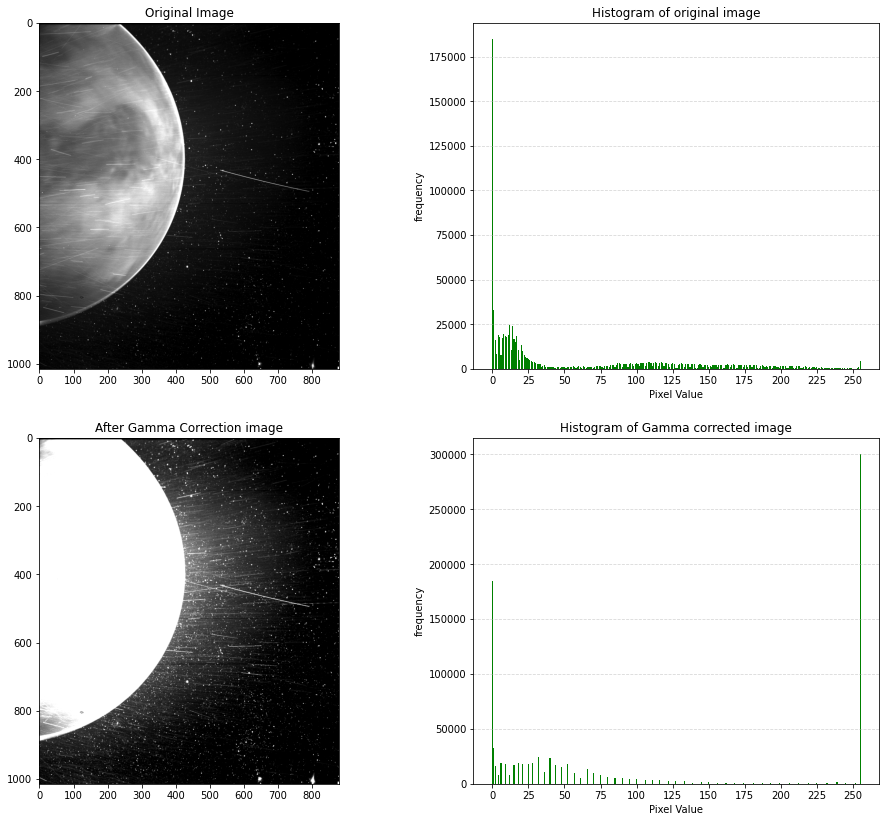

In [16]:
plt.figure(figsize=(16, 14))

plt.subplot(2, 2, 1)
plt.imshow(gray_venus, cmap='gray')
plt.title("Original Image")

hist = create_histogram(gray_venus)
plt.subplot(2, 2, 2)
plt.bar(range(len(hist)), hist, color='green')
plt.xlabel('Pixel Value')
plt.ylabel('frequency')
plt.title('Histogram of original image')
plt.xticks(np.arange(0, 256, 25)) 
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Apply Log Magnitude compression
aftergamma_venus = gamma_correction(gray_venus)

plt.subplot(2, 2, 3)
plt.imshow(aftergamma_venus, cmap='gray')
plt.title(f"After Gamma Correction image")

hist = create_histogram(aftergamma_venus)
plt.subplot(2, 2, 4)
plt.bar(range(len(hist)), hist, color='green')
plt.xlabel('Pixel Value')
plt.ylabel('frequency')
plt.title(f'Histogram of Gamma corrected image')
plt.xticks(np.arange(0, 256, 25)) 
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

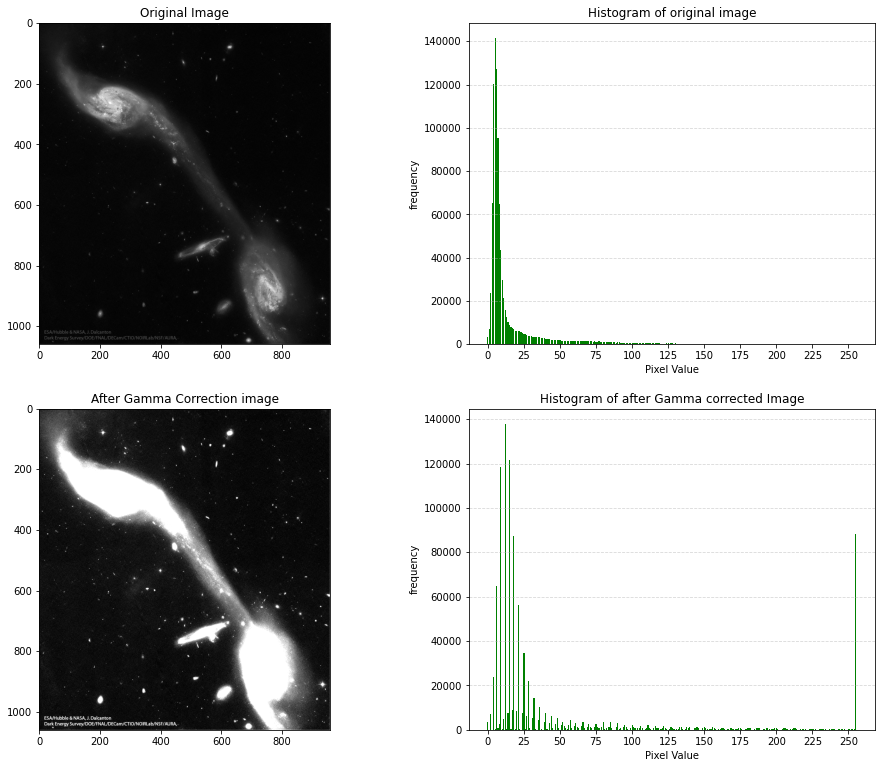

In [17]:
plt.figure(figsize=(16, 13))

plt.subplot(2, 2, 1)
plt.imshow(gray_wildtriplet, cmap='gray')
plt.title("Original Image")

hist = create_histogram(gray_wildtriplet)
plt.subplot(2, 2, 2)
plt.bar(range(len(hist)), hist, color='green')
plt.xlabel('Pixel Value')
plt.ylabel('frequency')
plt.title('Histogram of original image')
plt.xticks(np.arange(0, 256, 25)) 
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Apply Log Magnitude compression
aftergamma_wildtriplet = gamma_correction(gray_wildtriplet)

plt.subplot(2, 2, 3)
plt.imshow(aftergamma_wildtriplet, cmap='gray')
plt.title(f"After Gamma Correction image")

hist = create_histogram(aftergamma_wildtriplet)
plt.subplot(2, 2, 4)
plt.bar(range(len(hist)), hist, color='green')
plt.xlabel('Pixel Value')
plt.ylabel('frequency')
plt.title(f'Histogram of after Gamma corrected Image')
plt.xticks(np.arange(0, 256, 25)) 
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

### Ques 5
Q5. Histogram flattening. Plot the histogram of the image before and after applying histogram flattening.

In [18]:
def histogram_flattening(I: np.ndarray):
    """ 
        Performs histogram flattening on the given input image.
        This function enhances the contrast of the image by redistributing the pixel intensities
        to makes rich use of available grayscale.
            Args:
                 I : the input Image as numpy 2d array
            Returns:
                Image after Hitogram flattening
                                                                """
    
    # Calculate the pdf of intensity 
    M, N = I.shape[0], I.shape[1] 
    hist = create_histogram(I)
    hist_pdf = hist/(N*M)
    
    # Calculate the cdf of the normalised histogram
    hist_cdf = np.zeros(256)
    hist_cdf[0] = hist_pdf[0]  
    for i in range(1, 256):
        hist_cdf[i] = hist_cdf[i - 1] + hist_pdf[i]
    
    flattened_I = np.zeros(I.shape)
    for row in range(M):
        for col in range(N):
            flattened_I[row, col] = hist_cdf[int(I[row, col])]      # lies between [0, 1]
            
    
    return FSCS(flattened_I)


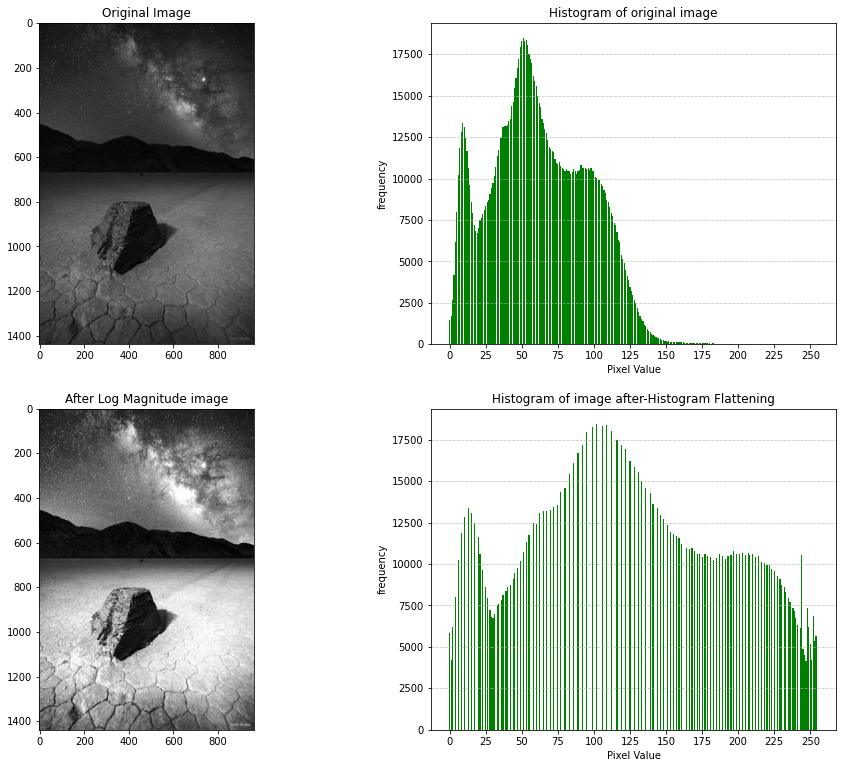

In [19]:
plt.figure(figsize=(16, 13))

plt.subplot(2, 2, 1)
plt.imshow(gray_sailing_stone, cmap='gray')
plt.title("Original Image")

hist = create_histogram(gray_sailing_stone)
plt.subplot(2, 2, 2)
plt.bar(range(len(hist)), hist, color='green')
plt.xlabel('Pixel Value')
plt.ylabel('frequency')
plt.title('Histogram of original image')
plt.xticks(np.arange(0, 256, 25)) 
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Apply Histogram Flattening
afterhist_sailing_stone = histogram_flattening(gray_sailing_stone)

plt.subplot(2, 2, 3)
plt.imshow(afterhist_sailing_stone, cmap='gray')
plt.title(f"After Log Magnitude image")

hist = create_histogram(afterhist_sailing_stone)
plt.subplot(2, 2, 4)
plt.bar(range(len(hist)), hist, color='green')
plt.xlabel('Pixel Value')
plt.ylabel('frequency')
plt.title(f'Histogram of image after-Histogram Flattening')
plt.xticks(np.arange(0, 256, 25)) 
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

# 2 Image Zooming (10)

Write a program to zoom an image by 1.5 times along each axis using the following techniques discussed
in class:

Test your program using three of your favorite images from the above set. Comment on the quality of the
two techniques and compare their computational complexity.

1. Nearest neighbor. (5)


In [20]:
def find_nn_coordinates(x, y):
    return round(x), round(y)
    
def nearest_neighbours(I: np.ndarray, x_scale=1.5, y_scale=1.5): 
    """
        Nearest neighbour interpolation for image scaling/zooming .
        Each pixel in the ouput image is determined by the pixel value of the NN neighbour
        
        Args:
            I: the input image
            x_scale: Scaling factor along the x-axis/Factor by which to zoom along x-axis(1.5 default)
            y_scale: Scaling factor along the y-axis/Factor by which to zoom along y-axis(1.5 default)
        
        Returns:
            The zoomed image using NN interpolation

    """
    M, N = I.shape[0], I.shape[1]
    
    new_M, new_N = int(x_scale * M), int(y_scale * N)
    zoomed_img = np.zeros((new_M, new_N), dtype=np.int64)        # dtype ?
    filled = np.zeros((new_M, new_N))        
    
    # Initialise the image
    for row in range(M):
        for col in range(N):
            zoomed_img[round(x_scale*row), round(y_scale*col)] = I[row, col]
            filled[round(x_scale*row), round(y_scale*col)] = 1
        
    # Use Nearest neighbours to fill the rest
    for i in range(new_M):
        for j in range(new_N):
            if filled[i, j] == 0:
                unscaled_i, unscaled_j = i/x_scale, j/y_scale
                x_nn, y_nn = find_nn_coordinates(unscaled_i, unscaled_j)
                
                zoomed_img[i, j] = I[min(x_nn, M - 1), min(y_nn, N - 1)]
        
    # Centering the zoomed image
    new_m = (new_M - M)//2
    new_n = (new_N - N)//2
    return zoomed_img[new_m : new_m + M , new_n : new_n + N]


2. Bilinear interpolation. (5)


In [21]:
def bilinear_interpolation(I:np.ndarray, x_scale=1.5, y_scale=1.5):
    """
        Billinear interpolation for image scaling/zooming .
        Each pixel in the ouput image is determined by a weighted average of the 4 nearest neighbours
        
        Args:
            I: the input image
            x_scale: Scaling factor along the x-axis/Factor by which to zoom along x-axis(1.5 default)
            y_scale: Scaling factor along the y-axis/Factor by which to zoom along y-axis(1.5 default)
        
        Returns:
            The zoomed image using Billinear interpolation

    """
    M, N = I.shape[0], I.shape[1]
    
    new_M, new_N = int(x_scale * M), int(y_scale * N)
    zoomed_img = np.zeros((new_M, new_N), dtype=np.int64)       
        
    # Use Billinear Interpolation to fill the new_img(x and i are row indices, y and j are column indices)
    for i in range(new_M):
        for j in range(new_N):
            unscaled_i, unscaled_j = i/x_scale, j/y_scale
            # Find the 4 nearest neighbours
            x1, y1 = math.floor(unscaled_i), math.floor(unscaled_j)
            x2, y2 = x1, min(y1 + 1, N - 1)
            x3, y3 = min(x1 + 1, M - 1), y1
            x4, y4 = min(x1 + 1, M - 1), min(y1 + 1, N - 1)
            
            # Calculate 0 <= a <= 1 and 0 <= b <= 1, 
            # the distance of unscaled_i, unscaled j from x1 and y1 respectively
            a = unscaled_i - x1
            b = unscaled_j - y1

            zoomed_img[i, j] = (1 - a)*(1 - b)*I[x1, y1] + (1 - a)*(b)*I[x2, y2] + (a)*(1 - b)*I[x3, y3] + (a)*(b)*I[x4, y4]
        
    # Centering the zoomed image
    new_m = (new_M - M)//2
    new_n = (new_N - N)//2
    return zoomed_img[new_m : new_m + M , new_n : new_n + N]
    

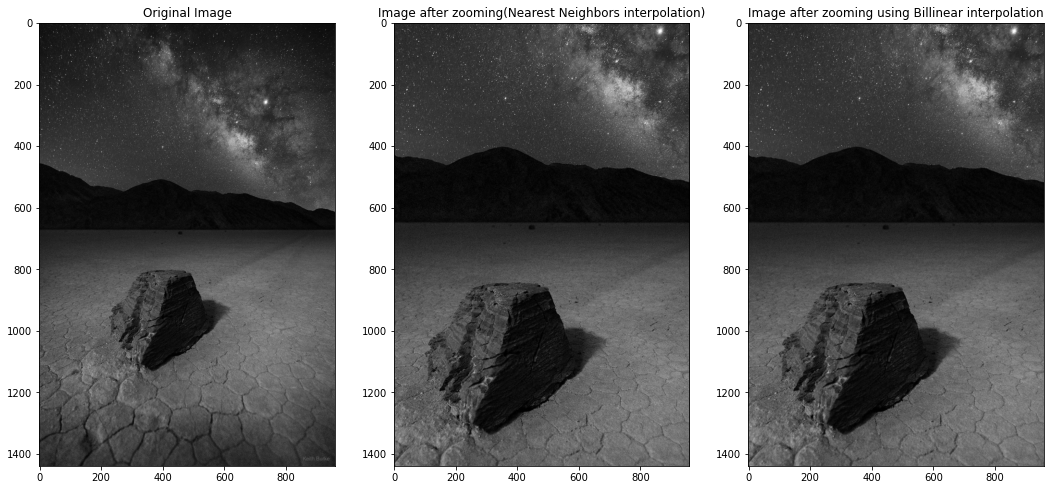

In [22]:
# define the img you want to zoom
img = gray_sailing_stone 
x_scale = 1.5
y_scale = 1.5

x = np.linspace(0 , 256 , 256 , endpoint = False)

plt.figure(figsize=(18, 12))
plt.subplot(1 , 3 , 1)
plt.imshow(img , cmap = "gray" , vmin = 0 , vmax = 255)
plt.title("Original Image")

plt.subplot(1 , 3 , 2)
plt.imshow(nearest_neighbours(img , x_scale , y_scale) , cmap = "gray" , vmin = 0 , vmax = 255)
plt.title("Image after zooming(Nearest Neighbors interpolation)")

plt.subplot(1 , 3 , 3)
plt.imshow(bilinear_interpolation(img , x_scale , y_scale) , cmap = "gray" , vmin = 0 , vmax = 255)
plt.title("Image after zooming using Billinear interpolation")

plt.show()

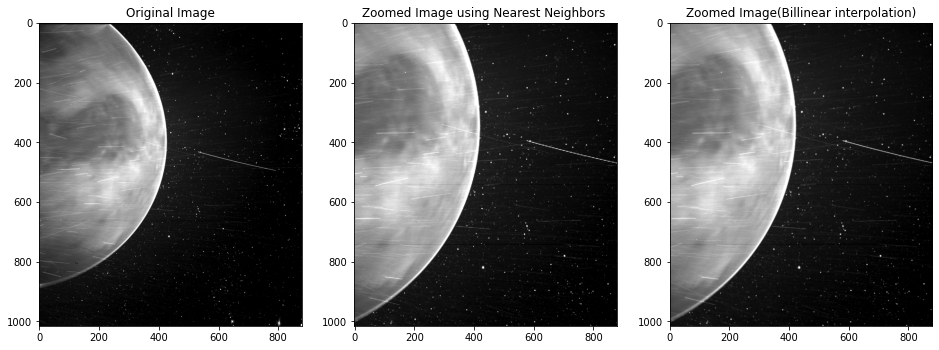

In [23]:
# define the img you want to zoom
img = gray_venus 
x_scale = 1.5
y_scale = 1.5

x = np.linspace(0 , 256 , 256 , endpoint = False)

plt.figure(figsize=(16, 12))
plt.subplot(1 , 3 , 1)
plt.imshow(img , cmap = "gray" , vmin = 0 , vmax = 255)
plt.title("Original Image")

plt.subplot(1 , 3 , 2)
plt.imshow(nearest_neighbours(img , x_scale , y_scale) , cmap = "gray" , vmin = 0 , vmax = 255)
plt.title("Zoomed Image using Nearest Neighbors ")

plt.subplot(1 , 3 , 3)
plt.imshow(bilinear_interpolation(img , x_scale , y_scale) , cmap = "gray" , vmin = 0 , vmax = 255)
plt.title("Zoomed Image(Billinear interpolation)")

plt.show()

### Comments: 
- Visually, there is not much difference between the Zoomed Image using Nearest Neighbour Interpolation and Billinear Interpolation
- Billinear Interpolation theoretically produces smoother images as it takes a weighted average of the 4 nearest neighbours, especially when scaling factors are larger 
- Disadvantage of using NN interpolation is production of upscaled images with the most jagged-edges
#### TIME COMPLEXITY: 
    - Nearest Neighbors: O(MN), M and N are the dimensions of the new image. This is because it just assigns the value of the nearest neighbor pixel value, for every pixel in the new image.
    - Billinear Interpolation: O(kMN), M and N are the dimensions of the new image, k = the number of constant calculations made per pixel.

# 3 2D-DFT (15)

Recall the definition of the 2D-DFT from class. Use square gray-scale images whose side is a power of
two (e.g., the USC SIPI images). Write a program that implements the DFT/IDFT pair using the following
techniques.
1. From first principles i.e., as a summation over two dimensions. (5)


In [24]:
def dft_first_principles(I: np.ndarray):
    
    N, M = I.shape[0], I.shape[1]
    I_hat = np.zeros((N, M), dtype=complex)
    
    for u in range(N):
        for v in range(M):
            for x in range(N):            
                for y in range(M):
                    complex_exp = np.exp(-2 * np.pi * 1j * ((u * x / N) + (v * y / M)))
                    I_hat[u, v] += I[x, y] * complex_exp
    
#     np.abs(I_hat), np.angle(I_hat)
    return I_hat

In [25]:
def idft_first_principles(I_hat):
    
    N, M = I_hat.shape[0], I_hat.shape[1]
    I = np.zeros((N, M))
    
    for x in range(N):
        for y in range(M):
            for u in range(N):            
                for v in range(M):
                    complex_exp = np.exp(2 * np.pi * 1j * ((u * x / N) + (v * y / M)))
                    I[x, y] += I_hat[u, v] * complex_exp
                        
            I[x, y] = I[x, y]/(N * M)
            
    return I.astype(np.int64)

2. Matrix multiplication using the complex exponential matrix. (5)


In [26]:
def dft_using_matrix_mult(I: np.ndarray):
    
    N, M = I.shape[0], I.shape[1]
    
    dft_matrix_row = np.zeros((N, N), dtype=complex)
    for i in range(N):
        for j in range(N):
            dft_matrix_row[i, j] = i * j
            
    c1 = np.exp(-2 * np.pi * 1j / N)
    dft_matrix_row = c1 ** dft_matrix_row
    
    
    dft_matrix_col = np.zeros((M, M), dtype=complex)
    for i in range(M):
        for j in range(M):
            dft_matrix_col[i, j] = i * j
            
    c2 = np.exp(-2 * np.pi * 1j / M)
    dft_matrix_col = c2 ** dft_matrix_col
        
        
    return np.dot(np.dot(dft_matrix_row, I), dft_matrix_col)    

In [27]:
def idft_using_matrix_mult(I_hat):
    
    N, M = I_hat.shape[0], I_hat.shape[1]
    
    idft_matrix_row = np.zeros((N, N), dtype=complex)
    for i in range(N):
        for j in range(N):
            idft_matrix_row[i, j] = i * j
            
    c1 = np.exp(2 * np.pi * 1j / N)
    idft_matrix_row = c1 ** idft_matrix_row
    
    
    idft_matrix_col = np.zeros((M, M), dtype=complex)
    for i in range(M):
        for j in range(M):
            idft_matrix_col[i, j] = i * j
            
    c2 = np.exp(2 * np.pi * 1j / M)
    idft_matrix_col = c2 ** idft_matrix_col
    
    I = np.dot(np.dot(idft_matrix_row, I_hat), idft_matrix_col)
    I = I/(N * M)
    
    return I.astype(np.int64)

In [28]:
def idft_using_matrix_mult2(mag_I_hat, phase_I_hat):
    
    I_hat = mag_I_hat * np.exp(1j * phase_I_hat)
    N, M = I_hat.shape[0], I_hat.shape[1]
    
    idft_matrix_row = np.zeros((N, N), dtype=complex)
    for i in range(N):
        for j in range(N):
            idft_matrix_row[i, j] = i * j
            
    c1 = np.exp(2 * np.pi * 1j / N)
    idft_matrix_row = c1 ** idft_matrix_row
    
    
    idft_matrix_col = np.zeros((M, M), dtype=complex)
    for i in range(M):
        for j in range(M):
            idft_matrix_col[i, j] = i * j
            
    c2 = np.exp(2 * np.pi * 1j / M)
    idft_matrix_col = c2 ** idft_matrix_col
    
    I = np.dot(np.dot(idft_matrix_row, I_hat), idft_matrix_col)
    I = I/(N * M)
    
    return I.astype(np.int64)

Now do the following using three of your favorite images from the above set:


In [29]:
# Load the 3 favourite images
# airplane - 7.1.02, APC - 7.1.08, Truck - 7.1.01

resolution_chart_path = "5.1.13.tiff"
resolution_chart = read_image(resolution_chart_path)[64 : 192 , 64 : 192]

airplane_img_path = "7.1.02.tiff"
airplane = read_image(airplane_img_path)[180 : 308, 200 : 328]


truck_img_path = "7.1.01.tiff"
truck = read_image(truck_img_path)[200 : 328 , 210 : 338]

# Print the shape of each image
print("Shape of airplane image:", airplane.shape)
print("Shape of resolution_chart image:", resolution_chart.shape)
print("Shape of truck image:", truck.shape)

Shape of airplane image: (128, 128)
Shape of resolution_chart image: (128, 128)
Shape of truck image: (128, 128)


### 1
-  Display the image, its DFT magnitude, phase, DFT magnitude subject to the logarithmic transformation.

### DFT using Using First Principles

In [30]:
images = {
    "Airplane": airplane,
    "Truck": truck,
    "Resolution Chart": resolution_chart
}

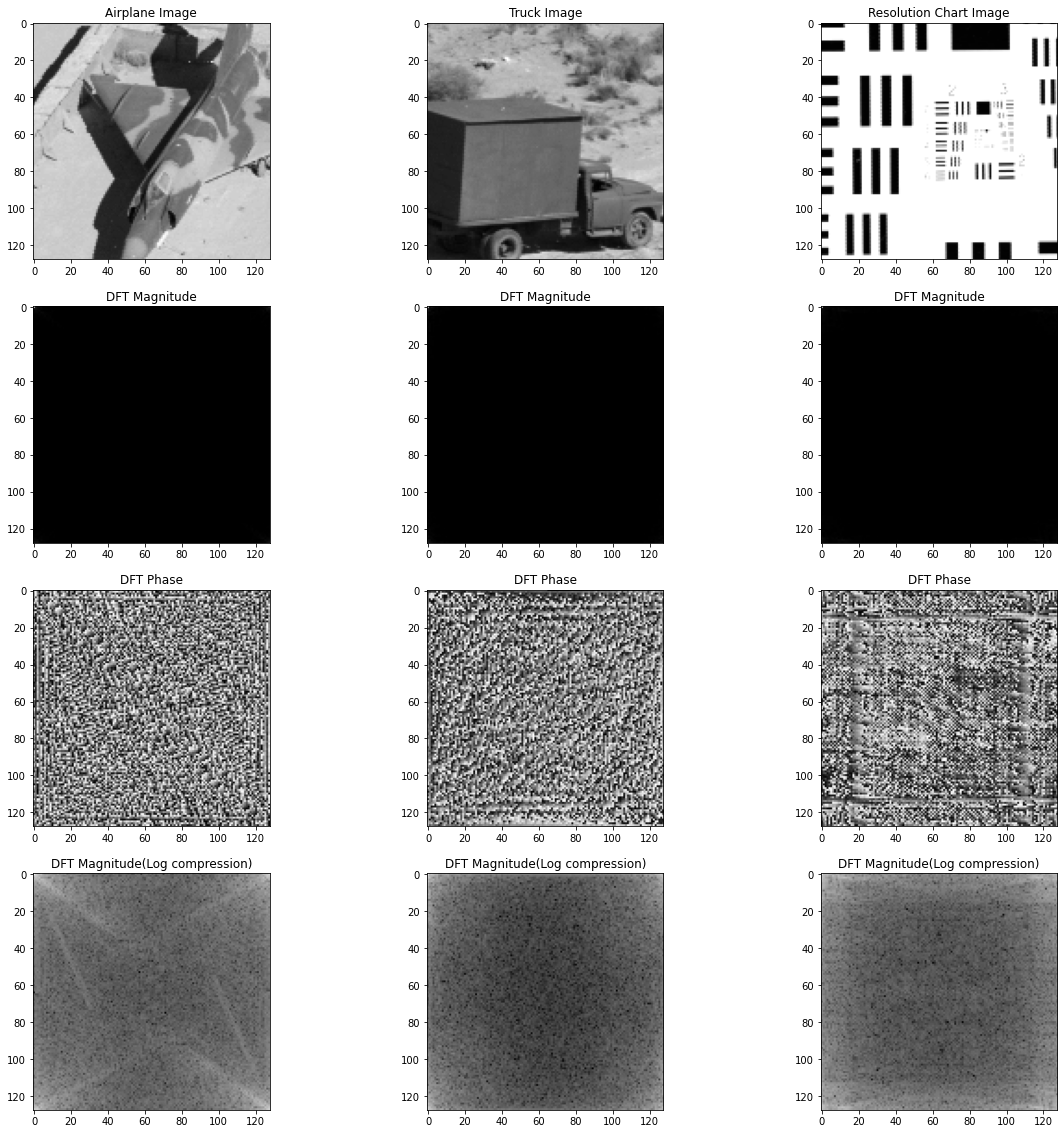

In [31]:
fig, axs = plt.subplots(4, 3, figsize=(20, 20))

for i, (name, img) in enumerate(images.items()):
    axs[0, i].imshow(img, cmap='gray')
    axs[0, i].set_title(f"{name} Image")
    
#     # Compute DFT
    dft = dft_first_principles(img)
    dft_mag = np.abs(dft)
    dft_phase = np.angle(dft)
    
    axs[1, i].imshow(FSCS(dft_mag), cmap='gray')
    axs[1, i].set_title("DFT Magnitude")
    
    axs[2, i].imshow(dft_phase, cmap='gray')
    axs[2, i].set_title("DFT Phase")
    
    axs[3, i].imshow(log_magnitude_compression(dft_mag), cmap='gray')
    axs[3, i].set_title("DFT Magnitude(Log compression)")
    

### DFT using Using Complex Exponential matrix 

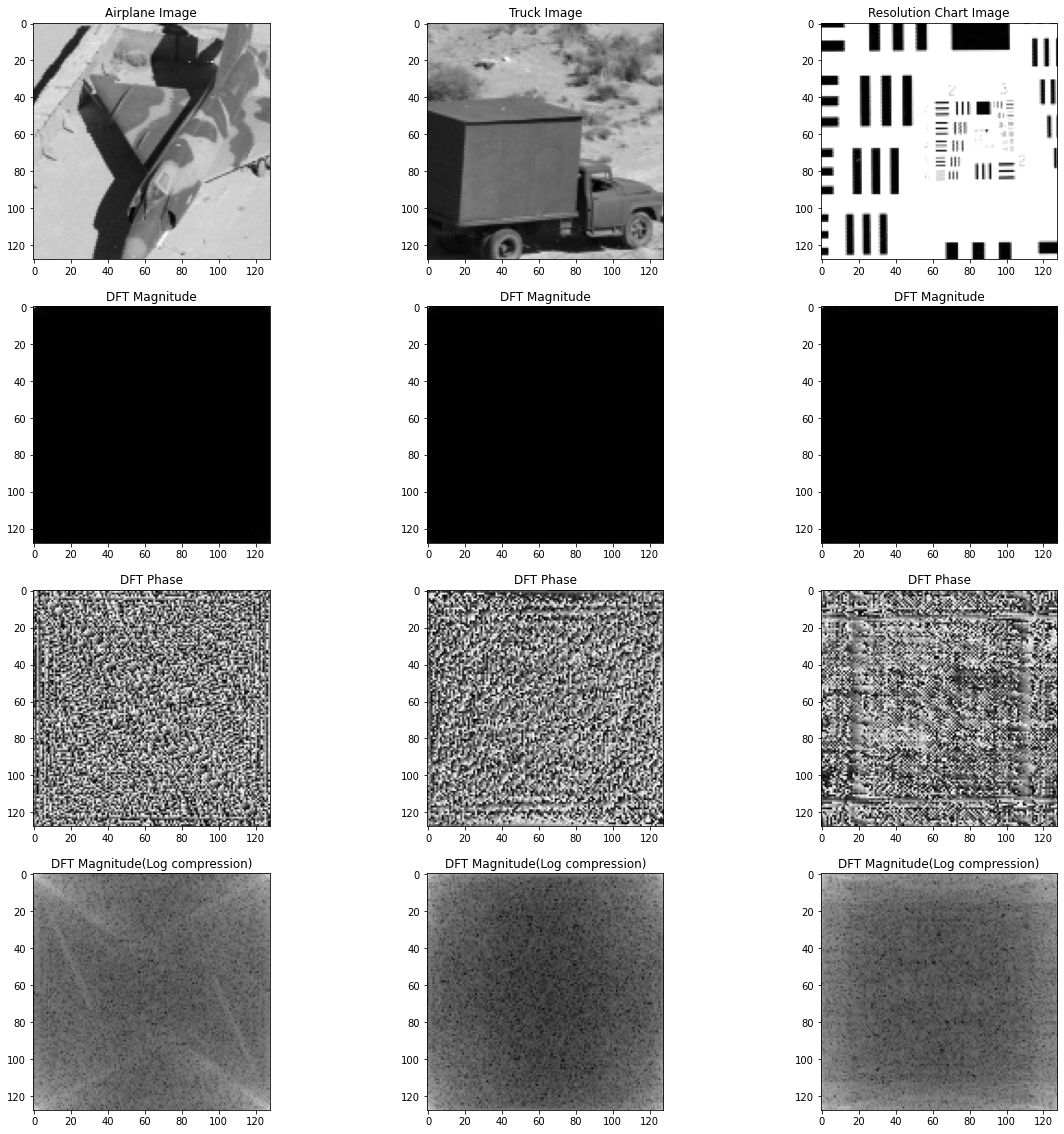

In [32]:
fig, axs = plt.subplots(4, 3, figsize=(20, 20))

for i, (name, img) in enumerate(images.items()):
    axs[0, i].imshow(img, cmap='gray')
    axs[0, i].set_title(f"{name} Image")
    
    # Compute DFT
    dft = dft_using_matrix_mult(img)
    dft_mag = np.abs(dft)
    dft_phase = np.angle(dft)
    
    axs[1, i].imshow(FSCS(dft_mag), cmap='gray')
    axs[1, i].set_title("DFT Magnitude")
    
    axs[2, i].imshow(dft_phase, cmap='gray')
    axs[2, i].set_title("DFT Phase")
    
    axs[3, i].imshow(log_magnitude_compression(dft_mag), cmap='gray')
    axs[3, i].set_title("DFT Magnitude(Log compression)")

### 2
- Generate the centered DFT using $(−1)^{i+j}$ I and display its magnitude

In [33]:
def centered_dft(I: np.ndarray):
    
    N, M = I.shape[0], I.shape[1]
    i, j = np.indices((N, M))
    
    new_I = I * (-1) ** (i + j)
    
    return dft_using_matrix_mult(new_I)

### Displaying the magnitude(centered DFT)

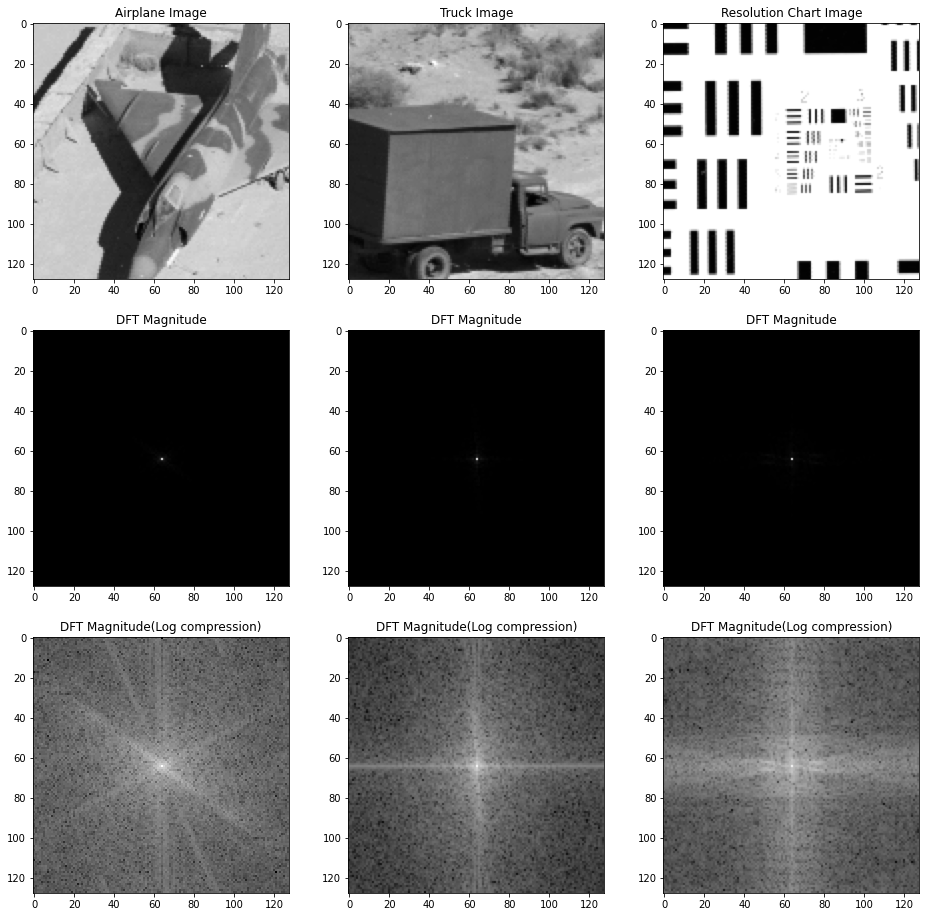

In [34]:
fig, axs = plt.subplots(3, 3, figsize=(16, 16))

for i, (name, img) in enumerate(images.items()):
    axs[0, i].imshow(img, cmap='gray')
    axs[0, i].set_title(f"{name} Image")
    
    # Compute DFT
    dft = centered_dft(img)
    dft_mag = np.abs(dft)
    
    axs[1, i].imshow(FSCS(dft_mag), cmap='gray')
    axs[1, i].set_title("DFT Magnitude")
    
    axs[2, i].imshow(log_magnitude_compression(dft_mag), cmap='gray')
    axs[2, i].set_title("DFT Magnitude(Log compression)")

### 3
-  Verify that IDFT[DFT[I]] = I.

For the image Resolution chart, Mean Squared Error (MSE): 0.41796875
For the image Airplane, Mean Squared Error (MSE): 0.57696533203125


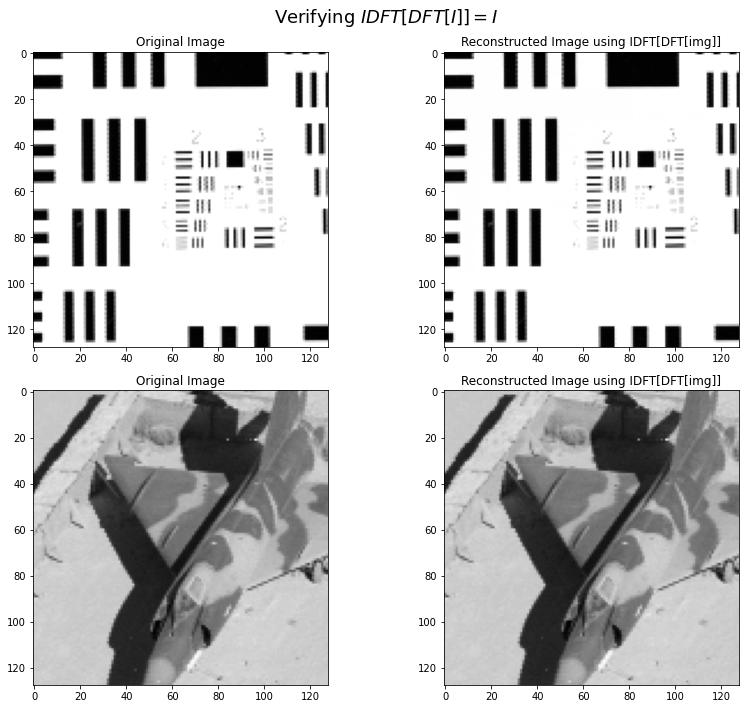

In [35]:
# Define the image for which you want to verify
I = resolution_chart
I_hat = dft_using_matrix_mult(I)
reconstructed_I = idft_using_matrix_mult(I_hat)

plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.imshow(I, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(np.abs(reconstructed_I), cmap='gray')
plt.title('Reconstructed Image using IDFT[DFT[img]]')
mse = np.mean((I - reconstructed_I) ** 2)
print(f'For the image Resolution chart, Mean Squared Error (MSE): {mse}')


# Define the image for which you want to verify
I = airplane
I_hat = dft_using_matrix_mult(I)
reconstructed_I = idft_using_matrix_mult(I_hat)

plt.subplot(2, 2, 3)
plt.imshow(I, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 2, 4)
plt.imshow(np.abs(reconstructed_I), cmap='gray')
plt.title('Reconstructed Image using IDFT[DFT[img]]')
mse = np.mean((I - reconstructed_I) ** 2)
print(f'For the image Airplane, Mean Squared Error (MSE): {mse}')

plt.suptitle("Verifying $IDFT[DFT[I]] = I$", fontsize=18)
plt.tight_layout()
plt.show()

## Answer :
- To our naked eye, the difference between the original and reconstructed Image using IDFT and DFT are slim to none.

- However, on computing the mean squared error between them, i.e the average squared difference between their pixel values are close to 0.5 which is less but still present. 

- This can be explained using the fact that there are lot of floating-point operations, precision loss, and accuracy issues inherent in our dft and idft custom functions.

- Also, it can be concluded that the difference is primarily from floating point representation issues rather than significant structural changes 

### 4
- Show the importance of phase by transposing the phase matrix and then synthesizing the image.
- Repeat by 
    - a) setting the phase to 0, and
    - b) by adding noise.

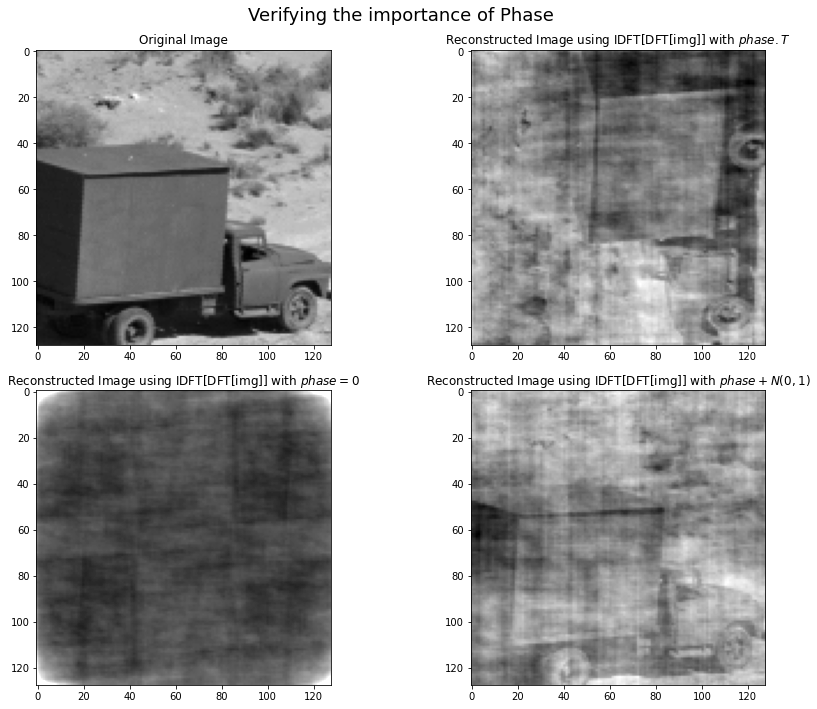

In [36]:
# Define the image for which you want to show the importance of the phase matrix
I = truck
I_hat = dft_using_matrix_mult(I)
mag_I_hat = np.abs(I_hat) 
phase_I_hat = np.angle(I_hat)

plt.figure(figsize=(13, 10))
plt.subplot(2, 2, 1)
plt.imshow(I, cmap='gray')
plt.title('Original Image')


reconstructed_I = idft_using_matrix_mult2(mag_I_hat, phase_I_hat.T)
plt.subplot(2, 2, 2)
plt.imshow(reconstructed_I, cmap='gray')
plt.title('Reconstructed Image using IDFT[DFT[img]] with $phase.T$')


reconstructed_I2 = idft_using_matrix_mult2(mag_I_hat, np.zeros(I.shape))
plt.subplot(2, 2, 3)
plt.imshow(reconstructed_I2, cmap='gray', vmin = 0 , vmax = 255)
plt.title('Reconstructed Image using IDFT[DFT[img]] with $phase = 0$')


noise = np.random.normal(0 , 1 , I.shape)
reconstructed_I3 = idft_using_matrix_mult2(mag_I_hat, phase_I_hat + noise)
plt.subplot(2, 2, 4)
plt.imshow(reconstructed_I3, cmap='gray')
plt.title('Reconstructed Image using IDFT[DFT[img]] with $phase + N(0,1)$')


plt.suptitle("Verifying the importance of Phase", fontsize=18)
plt.tight_layout()
plt.show()